# **Clustering in Lower Dimensional Space**
- Caution, if you rerun this the mapping to umap space is slightly different every time
- So I recommend rerunning the GMM fitting which means the colours and labelling of the clusters will be offset and thus not neccesarily matched as this is dependent on random initialisations
- Overall the results will be the same

In [1]:
from analysis import ReducedGMMPipeline
from astropy.table import Table
import numpy as np

In [2]:
# The follow data is important:
# 1. It includes the relavent data for the analysis which will be converted to lower dimensionality
# 2. It includes the assigments given in the high dimensional space XD analysis, this is purely to show the comparison of clustering results
galah_assigned_data_path = 'XD_Results/Galah_postGMM/galah_GMM_scaled_Gauss5_results.fits'
galah_postXD = Table.read(galah_assigned_data_path, format='fits')

# The follow data keys are incorprated into the analysis:
galah_data_keys = ['fe_h', 'alpha_fe', 'Na_fe', 'Al_fe', 'Mn_fe', 'Y_fe', 'Ba_fe', 'Eu_fe', 'Mg_Cu', 'Mg_Mn', 'Ba_Eu', 'Energy']

In [3]:
# This reruns the GMM analysis on the data, if False it will use the previous saved results:
rerun_GMM = False

In [4]:
# Initalise the pipeline with the following UMAP
pipeline = ReducedGMMPipeline(galah_postXD, galah_data_keys, umap_dimensions = 2, umap_n_neighbors = 15, umap_min_dist = 0.0)
if not rerun_GMM:
    pipeline.umap_data = np.load("XD_Results/Galah/galah_umap_space_8_6.npy")

/Users/jacobtutt/Desktop/MPhil_DIS/Project/diss_venvs/diss_2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jacobtutt/Desktop/MPhil_DIS/Project/diss_venvs/diss_2/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


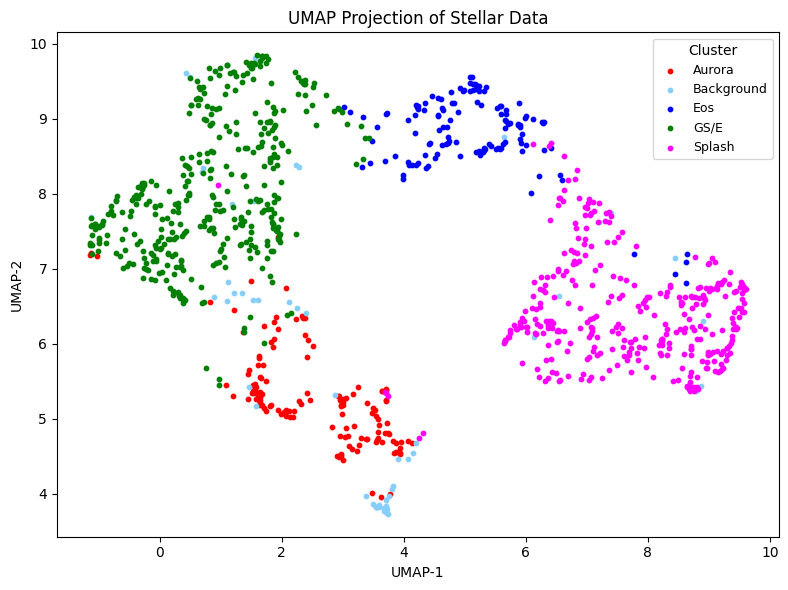

In [5]:
# This is simply a mapping from the high dimensional clusters to their name
labels_name = {
    4: "GS/E",
    2: "Splash",
    1: "Aurora",
    5: "Eos",
    3: "Background",
}
# And the corrosponding colours for the clusters
labels_color_map = {
    "GS/E": "green",
    "Splash": "magenta",
    "Aurora": "red",
    "Eos": "blue",
    "Background": "lightskyblue"
}

# This will demonstarate the lower dimensional space and the higher dimensional clusters:
pipeline.display_umap( label_dict = labels_name, colour_dict = labels_color_map ) 

In [6]:
# This will run the GMM fitting across multiple initialisation on the lower diemnsional dataset, this is not typically re-run to allow for fast reproduction
# It also allows constant colors and assignment to be demonstated 
if rerun_GMM:
    pipeline.run_GMM(gauss_component_range = (1, 10), n_init = 300, save_path = 'XD_Results/Galah/gallah_reducedGMM_8_6.pkl')

Best BIC Score: 7547.7211
  - Components: 10
 The following filters were applied: {'n_gauss': 4}
 Best BIC Score from filtered inputs: 7885.4374 occurred at:
   - Gaussian Components (n_gauss): 4

Model Fit Summary:
+----+-----------+---------+---------+------------------+
|    |   n_gauss |     BIC |     AIC |   log_likelihood |
|----+-----------+---------+---------+------------------|
|  0 |         1 | 9181.08 | 9156.24 |         -4573.12 |
|  1 |         2 | 8547.03 | 8492.39 |         -4235.2  |
|  2 |         3 | 8141.81 | 8057.37 |         -4011.69 |
|  3 |         4 | 7885.44 | 7771.2  |         -3862.6  |
|  4 |         5 | 7760.76 | 7616.72 |         -3779.36 |
|  5 |         6 | 7684.85 | 7511    |         -3720.5  |
|  6 |         7 | 7631.91 | 7428.26 |         -3673.13 |
|  7 |         8 | 7591.61 | 7358.17 |         -3632.08 |
|  8 |         9 | 7561.31 | 7298.06 |         -3596.03 |
|  9 |        10 | 7547.72 | 7254.67 |         -3568.34 |
+----+-----------+---------+--

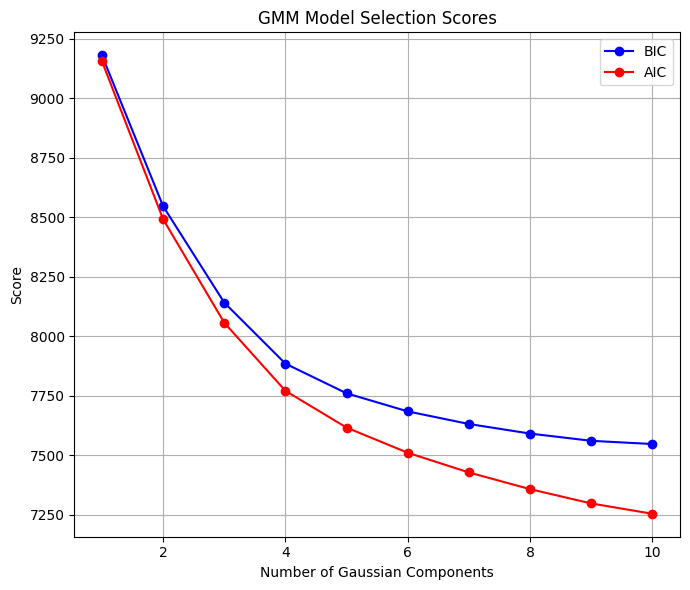

In [7]:
# A comparison of the GMM results on the lower dimensional data and the higher dimensional data
# In this I actually selection 4 gaussian features, this is not the best fit
pipeline.compare_GMM(opt_metric='BIC', n_gauss_filter = 4, save_path = 'XD_Results/Galah/gallah_reducedGMM_8_6.pkl', display_full = True) 

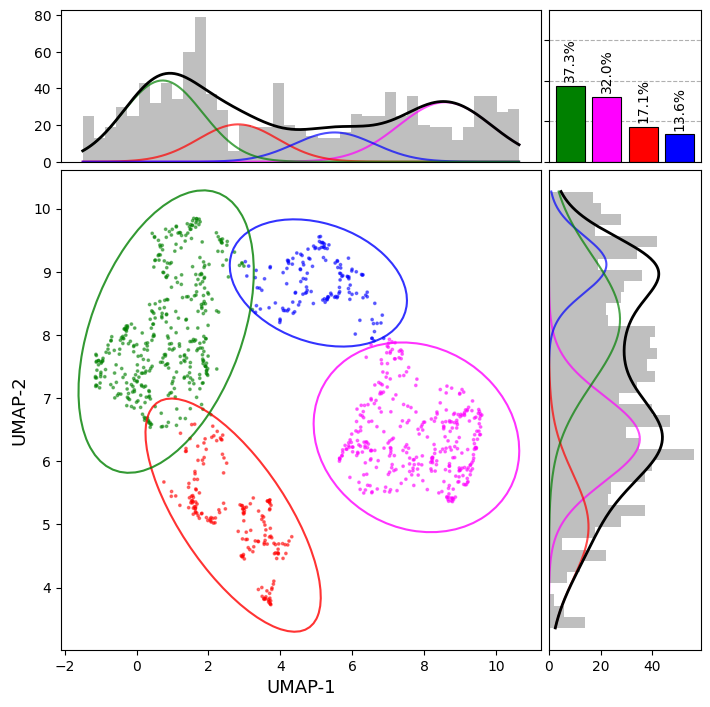

In [8]:
pipeline.plot_GMM_umap(z_score = 2.0, color_palette=["magenta", "red", "blue", "green"])

In [9]:
labels = {
    3: "GS/E",
    0: "Splash",
    1: "Aurora",
    2: "Eos",
}
summary_table = pipeline.table_results_GMM(labels)


Summary of GMM Components (from UMAP labels + weights)
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+--------------+-----------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Na_fe        | Al_fe        | Mn_fe        | Y_fe        | Ba_fe       | Eu_fe       | Mg_Cu       | Mg_Mn       | Ba_Eu        | Energy                |
+====+=============+==============+=========+=============+==============+=============+==============+==============+==============+=============+=============+=============+=============+=============+==============+=======================+
|  0 | GS/E        |         37.3 |     399 |        37.6 | -0.96 ± 0.20 | 0.11 ± 0.08 | -0.27 ± 0.12 | -0.15 ± 0.15 | -0.36 ± 0.12 | 0.08 ± 0.17 | 0.39 ± 0.21 | 0.47 ± 0.14 | 0.61 ± 0.10 | 0.46 ± 0.14 | -0.09 ± 0.2

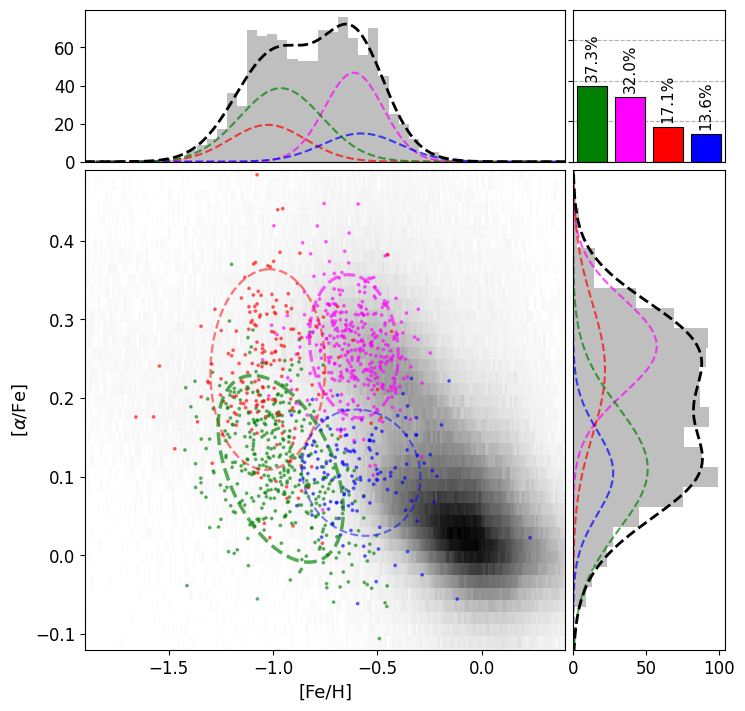

In [10]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
)

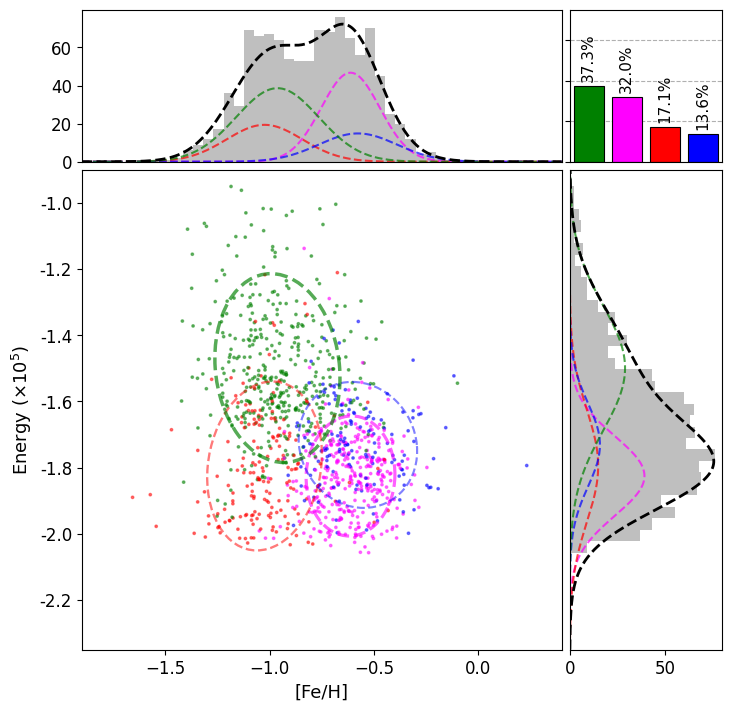

In [11]:
pipeline.plot_highdim_gaussian( x_key = 'fe_h', y_key='Energy',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim = (-1.9, 0.4), ylim=(-2.35e5, -0.9e5),
)

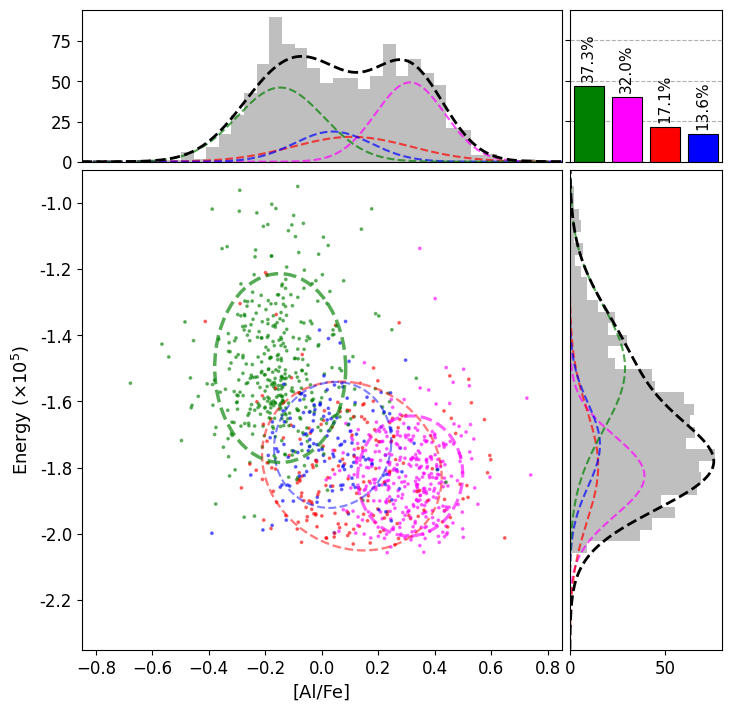

In [12]:
pipeline.plot_highdim_gaussian( x_key = 'Al_fe', y_key='Energy',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim = (-0.85, 0.85), ylim=(-2.35e5, -0.9e5),
)

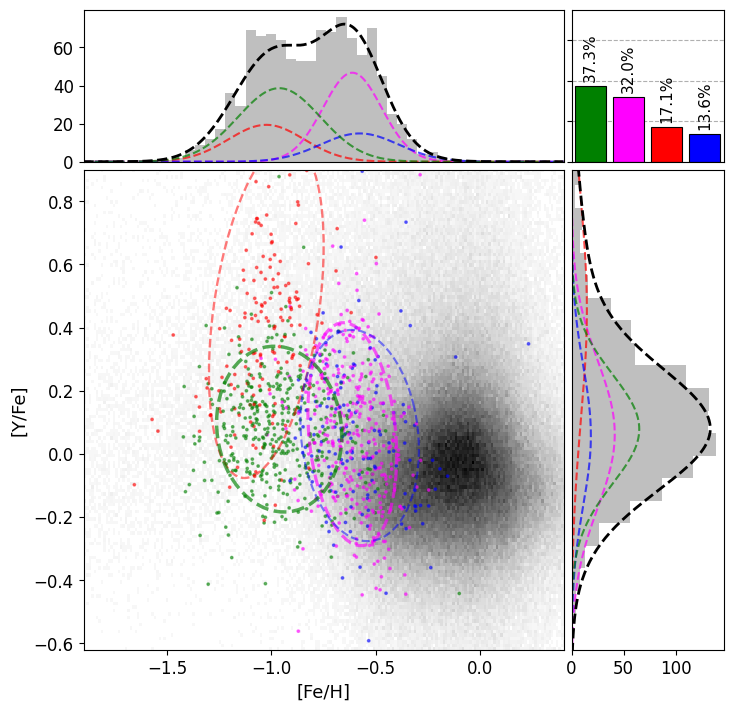

In [13]:
pipeline.plot_highdim_gaussian( x_key = 'fe_h', y_key='Y_fe',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim = (-1.9, 0.4), ylim=(-0.62, 0.9),
)

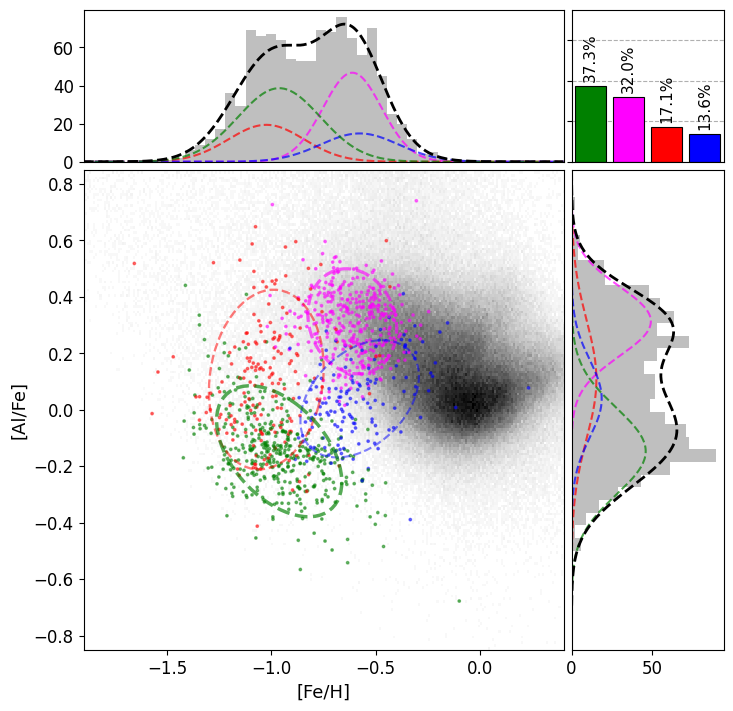

In [14]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='Al_fe', 
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim = (-1.9, 0.4), ylim=(-0.85, 0.85),
)

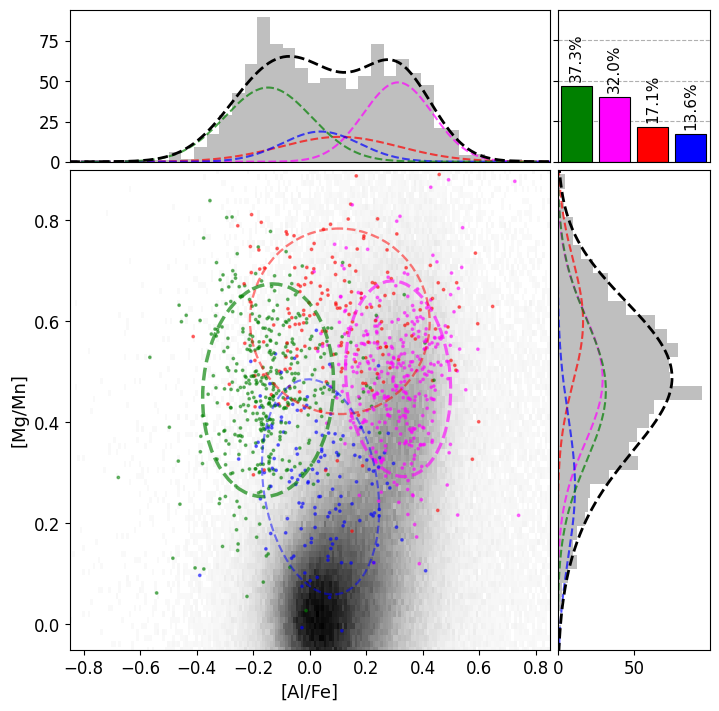

In [15]:
pipeline.plot_highdim_gaussian( x_key = 'Al_fe', y_key='Mg_Mn',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim =(-0.85, 0.85), ylim=(-0.05, 0.9),
)

## **Exploring higher number of gaussians:** 5 Gassians

 The following filters were applied: {'n_gauss': 5}
 Best BIC Score from filtered inputs: 7760.7577 occurred at:
   - Gaussian Components (n_gauss): 5


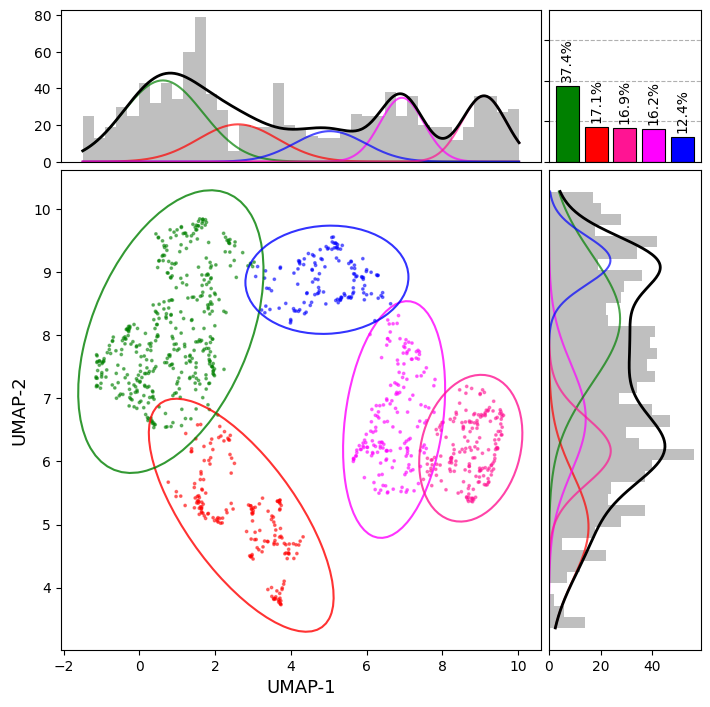

In [16]:
pipeline.compare_GMM(opt_metric='BIC', n_gauss_filter = 5, save_path = 'XD_Results/Galah/gallah_reducedGMM_8_6.pkl', display_full = False) 
pipeline.plot_GMM_umap(z_score = 2.0, color_palette=["red", "magenta", "green", "blue", 'deeppink'])

In [17]:
labels = {
    2: "GS/E",
    1: "Splash 1",
    4: "Splash 2",
    0: "Aurora",
    3: "Eos",
}

summary_table = pipeline.table_results_GMM(labels, combine = [[1,4]], labels_combined= ['Splash'])


Summary of GMM Components (from UMAP labels + weights)
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+--------------+-----------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Na_fe        | Al_fe        | Mn_fe        | Y_fe        | Ba_fe       | Eu_fe       | Mg_Cu       | Mg_Mn       | Ba_Eu        | Energy                |
+====+=============+==============+=========+=============+==============+=============+==============+==============+==============+=============+=============+=============+=============+=============+==============+=======================+
|  0 | GS/E        |         37.4 |     399 |        37.6 | -0.96 ± 0.20 | 0.11 ± 0.08 | -0.27 ± 0.12 | -0.15 ± 0.15 | -0.36 ± 0.12 | 0.08 ± 0.17 | 0.39 ± 0.21 | 0.47 ± 0.14 | 0.61 ± 0.10 | 0.46 ± 0.14 | -0.09 ± 0.2

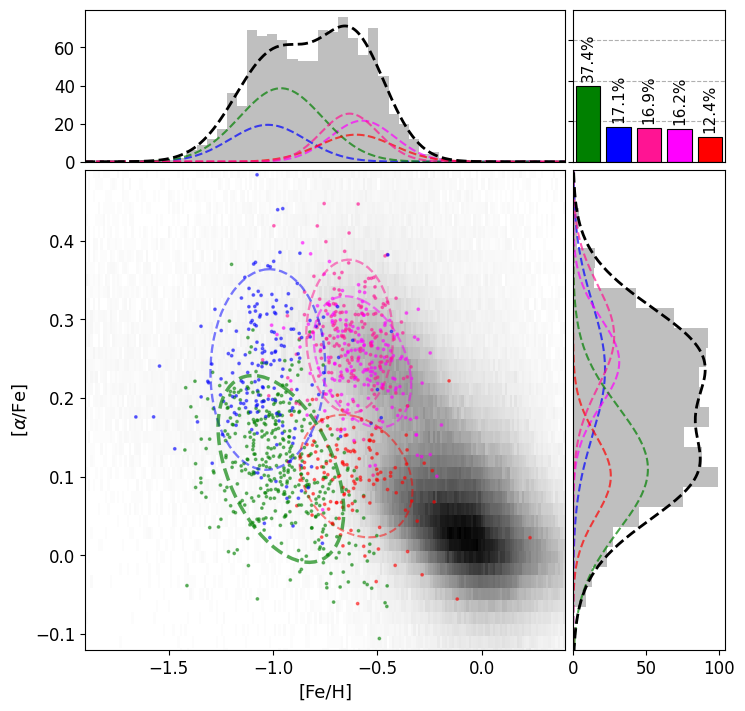

In [18]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["blue", "magenta", "green", "red", "deeppink"], 
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
)

## **Exploring higher number of gaussians:** 6 Gassians

 The following filters were applied: {'n_gauss': 6}
 Best BIC Score from filtered inputs: 7684.8467 occurred at:
   - Gaussian Components (n_gauss): 6


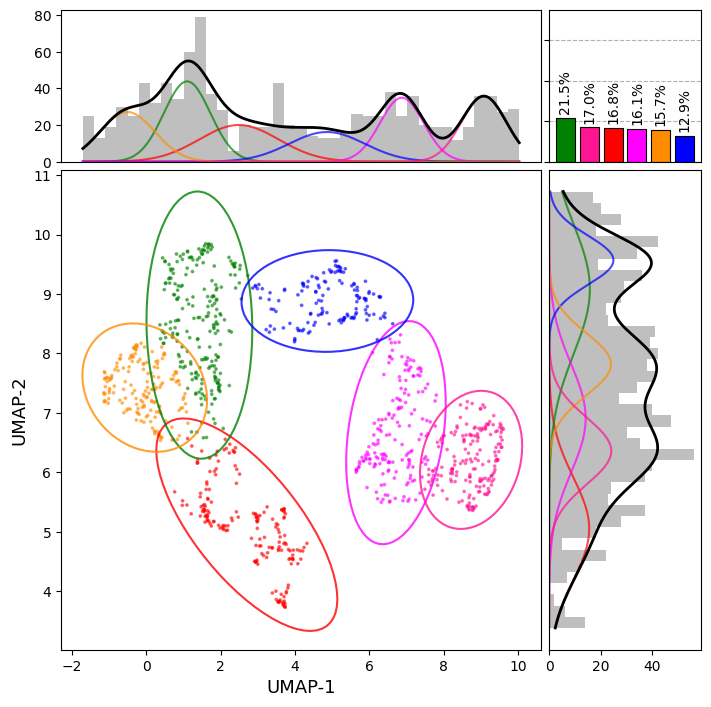

In [19]:
pipeline.compare_GMM(opt_metric='BIC', n_gauss_filter = 6, save_path = 'XD_Results/Galah/gallah_reducedGMM_8_6.pkl', display_full = False) 
pipeline.plot_GMM_umap(z_score = 2.0, color_palette=["red", "green", "magenta", "blue", 'darkorange', 'deeppink'])

In [20]:
labels = {
    1: "GS/E 1",
    4: "GS/E 2",
    2: "Splash 1",
    5: "Splash 2",
    0: "Aurora",
    3: "Eos",
}

summary_table = pipeline.table_results_GMM(labels, combine = [[1,4], [2,5]], labels_combined= ['GS/E', 'Splash'])


Summary of GMM Components (from UMAP labels + weights)
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+--------------+-----------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Na_fe        | Al_fe        | Mn_fe        | Y_fe        | Ba_fe       | Eu_fe       | Mg_Cu       | Mg_Mn       | Ba_Eu        | Energy                |
+====+=============+==============+=========+=============+==============+=============+==============+==============+==============+=============+=============+=============+=============+=============+==============+=======================+
|  0 | GS/E 1      |         21.5 |     226 |        21.3 | -0.87 ± 0.18 | 0.10 ± 0.09 | -0.26 ± 0.13 | -0.16 ± 0.15 | -0.30 ± 0.11 | 0.08 ± 0.18 | 0.38 ± 0.21 | 0.47 ± 0.14 | 0.58 ± 0.10 | 0.38 ± 0.11 | -0.09 ± 0.2

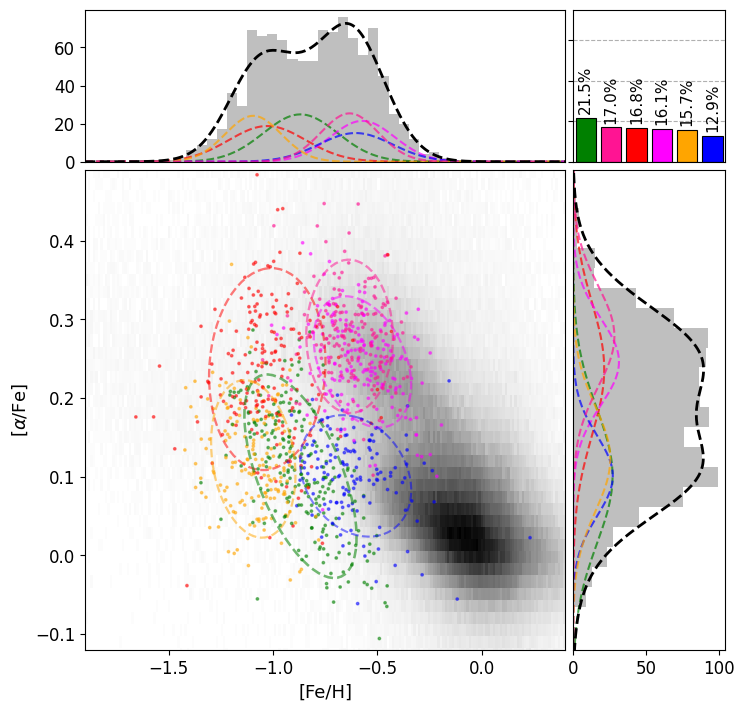

In [21]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "green", "magenta", "blue", "orange", "deeppink"], 
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
)

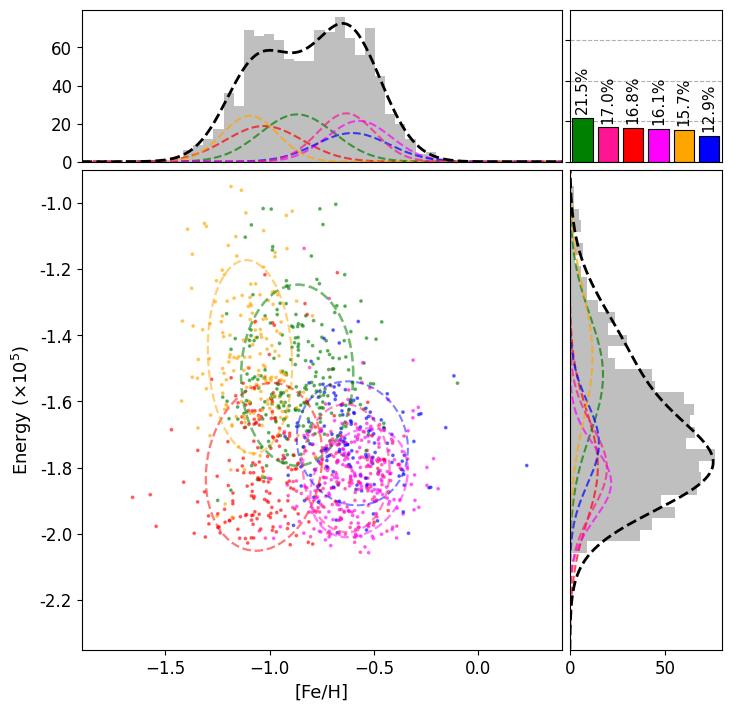

In [22]:
pipeline.plot_highdim_gaussian( x_key = 'fe_h', y_key='Energy',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "green", "magenta", "blue", "orange", "deeppink"], 
    xlim = (-1.9, 0.4), ylim=(-2.35e5, -0.9e5),
)

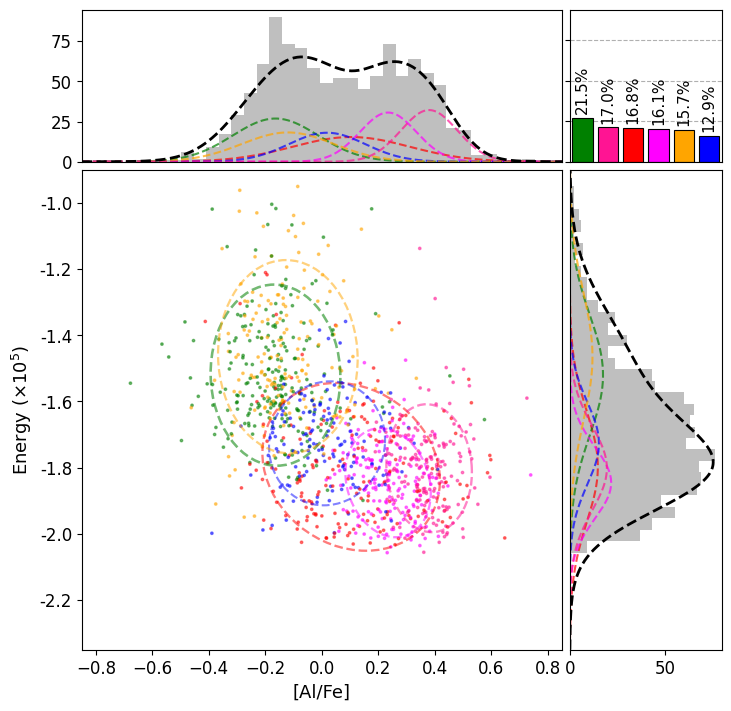

In [23]:
pipeline.plot_highdim_gaussian(  x_key = 'Al_fe', y_key='Energy',
    z_score=1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "green", "magenta", "blue", "orange", "deeppink"], 
    xlim = (-0.85, 0.85), ylim=(-2.35e5, -0.9e5),
)